In [32]:
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils.class_weight import compute_class_weight

In [4]:
df = pd.read_csv('../data/wine_quality_modelos2.csv')
df

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,baja,media,alta,quality_category
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0,0,baja
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,0,0,baja
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1,0,0,baja
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,1,0,media
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0,0,baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,1,0,media
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,0,0,baja
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,1,0,media
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,1,0,media


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine_type             6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  baja                  6497 non-null   int64  
 14  media                 6497 non-null   int64  
 15  alta                 

In [15]:
mapeo_quality_category = {
    'baja': 0,
    'media': 1,
    'alta': 2
}
df['quality_category_int'] = df['quality_category'].map(mapeo_quality_category)

In [16]:
map_wine_type = {
    "red": 0,
    "white": 1
}

df["wine_type_int"] = df["wine_type"].map(map_wine_type)

In [19]:
st_scaler = StandardScaler()

# Separamos las features de las etiquetas 
X = df[['volatile acidity','chlorides','density','alcohol']]
y = df["quality_category_int"]

# Escalamos los datos
X_scaled = st_scaler.fit_transform(X)

In [20]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size = 0.2, random_state = 10, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10, stratify=y_temp)

In [40]:
capas = [
    keras.layers.Flatten(input_dim=4),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 3, activation='softmax')
]

model = keras.models.Sequential(capas)

model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.summary()

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

history = model.fit(
    X_train,
    y_train,
    class_weight=class_weights_dict,
    batch_size = 32,
    epochs = 100,
    validation_data = (X_valid, y_valid) # validation_split = 0.1
)

results = model.evaluate(X_test, y_test)
results

c:\Users\amaci\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 300)            │         1,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 3)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,403 (9.39 KB)

 Trainable params: 2,403 (9.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3584 - loss: 1.0119 - val_accuracy: 0.4015 - val_loss: 1.0242
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4160 - loss: 0.8596 - val_accuracy: 0.4338 - val_loss: 0.9994
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4385 - loss: 0.8545 - val_accuracy: 0.4646 - val_loss: 0.9680
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4599 - loss: 0.8585 - val_accuracy: 0.4877 - val_loss: 0.9405
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4960 - loss: 0.8195 - val_accuracy: 0.4815 - val_loss: 0.9676
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4674 - loss: 0.8655 - val_accuracy: 0.5246 - val_loss: 0.9130
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5098 - loss: 0.8850 - val_accuracy: 0.4938 - val_loss: 0.9459
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4930 - loss: 0.8322 - val_accu

[0.8806260228157043, 0.5676922798156738]

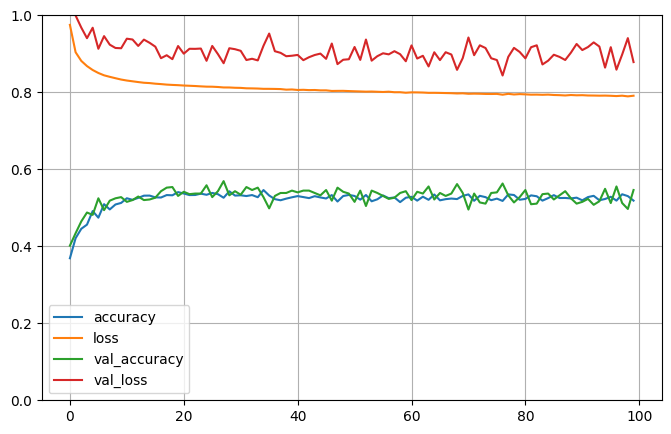

In [41]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [42]:
predictions = model.predict(X_test)
predictions

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.27557418, 0.444101  , 0.28032473],
       [0.17227876, 0.50853556, 0.3191857 ],
       [0.77209675, 0.21481724, 0.013086  ],
       ...,
       [0.38212073, 0.41247427, 0.20540495],
       [0.5070712 , 0.393788  , 0.09914073],
       [0.05595111, 0.30286103, 0.64118785]], dtype=float32)

In [43]:
model.predict(X_test).argmax(axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([1, 1, 0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1, 0, 0, 2,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 2, 1, 1, 1, 1, 0, 0,
       2, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 2, 1,
       0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1,
       2, 1, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0,
       1, 1, 2, 2, 0, 2, 0, 1, 0, 2, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0,
       0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 0, 2, 0,
       0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       2, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1,
       0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0, 1,

In [44]:
confusion_matrix(y_test, model.predict(X_test).argmax(axis=1))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[174,  51,  13],
       [108, 177, 107],
       [  0,   2,  18]])

In [45]:
print(classification_report(y_test, model.predict(X_test).argmax(axis=1)))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.62      0.73      0.67       238
           1       0.77      0.45      0.57       392
           2       0.13      0.90      0.23        20

    accuracy                           0.57       650
   macro avg       0.51      0.69      0.49       650
weighted avg       0.69      0.57      0.60       650

